In [ ]:
# change binary categorical columns to 0,1
# train test split
# target encoding to rest of categorical columns (benefits over one hot encoding)
# min max scale to standardize
# when using preprocessing, use fit_transform on training data, transform on testing data
# oversample to handle imbalance (SMOTE method)

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import TargetEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

df = pd.read_csv('heart_2022_with_nans.csv')

In [ ]:
# changes cols with only 'yes' 'no' values to 1,0
# also changes sex column- male = 1, female = 0
df_clean = df.copy()
df_clean.drop_duplicates()
df_clean.dropna(inplace=True)

In [ ]:
# cols_to_keep = ['HighRiskLastYear','BMI' ,'PhysicalActivities', 'HadKidneyDisease', 'HadCOPD', 'GeneralHealth', 'Sex', 'State', 'AgeCategory', 'SmokerStatus', 'BlindOrVisionDifficulty', 'DeafOrHardOfHearing', 'HadDiabetes', 'HadArthritis', 'HadDepressiveDisorder', 'HadAsthma', 'HadStroke', 'HadAngina', 'RemovedTeeth', 'AlcoholDrinkers', 'HadHeartAttack']
cols_to_keep = ['HighRiskLastYear','BMI' ,'PhysicalActivities', 'HadKidneyDisease', 'HadCOPD', 'GeneralHealth', 'Sex', 'AgeCategory', 'SmokerStatus', 'HadDiabetes', 'HadArthritis', 'HadStroke', 'HadAngina', 'AlcoholDrinkers', 'HadHeartAttack']
df_clean = df_clean[cols_to_keep]
df_clean.head()

,HighRiskLastYear,BMI,PhysicalActivities,HadKidneyDisease,HadCOPD,GeneralHealth,Sex,AgeCategory,SmokerStatus,HadDiabetes,HadArthritis,HadStroke,HadAngina,AlcoholDrinkers,HadHeartAttack
342,No,27.99,Yes,No,No,Very good,Female,Age 65 to 69,Former smoker,No,Yes,No,No,No,No
343,No,30.13,Yes,No,No,Very good,Male,Age 70 to 74,Former smoker,Yes,Yes,No,No,No,No
345,No,31.66,No,No,No,Very good,Male,Age 75 to 79,Former smoker,No,Yes,No,No,Yes,No
346,No,31.32,Yes,No,No,Fair,Female,Age 80 or older,Never smoked,No,Yes,No,No,No,No
347,No,33.07,Yes,No,No,Good,Female,Age 80 or older,Never smoked,No,Yes,No,No,No,No


In [ ]:
# cols_to_binary = ['HighRiskLastYear', 'PhysicalActivities', 'HadKidneyDisease', 'HadCOPD', 'BlindOrVisionDifficulty', 'DeafOrHardOfHearing', 'HadDiabetes', 'HadArthritis', 'HadDepressiveDisorder', 'HadAsthma', 'HadStroke', 'HadAngina', 'AlcoholDrinkers', 'HadHeartAttack']
cols_to_binary = ['HighRiskLastYear', 'PhysicalActivities', 'HadKidneyDisease', 'HadCOPD', 'HadDiabetes', 'HadArthritis', 'HadStroke', 'HadAngina', 'AlcoholDrinkers', 'HadHeartAttack']
for col in cols_to_binary:
    df_clean[col] = np.where(df_clean[col] == 'Yes',1,0)

df_clean['Sex'] = np.where(df_clean['Sex'] == 'Male', 1,0)

In [ ]:
# Separate features and target variable
X = df_clean.drop('HadHeartAttack', axis=1)
y = df_clean['HadHeartAttack']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

# Apply Target Encoding
# encoder = TargetEncoder(cols=['GeneralHealth', 'State', 'AgeCategory', 'SmokerStatus', 'RemovedTeeth'])
encoder = TargetEncoder(cols=['GeneralHealth', 'AgeCategory', 'SmokerStatus'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)

In [ ]:
X_val_encoded

,HighRiskLastYear,BMI,PhysicalActivities,HadKidneyDisease,HadCOPD,GeneralHealth,Sex,AgeCategory,SmokerStatus,HadDiabetes,HadArthritis,HadStroke,HadAngina,AlcoholDrinkers
354325,0,40.35,1,0,0,0.059646,0,0.034554,0.083064,1,1,0,0,0
421004,0,34.97,1,0,0,0.059646,0,0.076588,0.082739,0,1,0,0,1
97676,0,34.97,1,0,0,0.214634,1,0.004403,0.037172,0,0,0,1,0
120435,0,45.19,0,1,1,0.059646,0,0.059275,0.082739,0,0,0,0,0
334817,0,19.49,1,0,0,0.014478,0,0.059275,0.037172,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105560,0,36.90,1,1,1,0.122492,0,0.115968,0.082739,0,1,0,0,1
89306,0,26.78,1,0,0,0.122492,0,0.092833,0.037172,0,1,0,0,0
338063,0,18.40,1,0,0,0.059646,0,0.050454,0.037172,0,1,0,0,1
22575,0,27.98,1,0,0,0.014478,1,0.024811,0.037172,0,0,0,0,1


In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
import lightgbm as lgb

# Create LightGBM dataset
train_data = lgb.Dataset(X_resampled, label=y_resampled)
val_data = lgb.Dataset(X_val_encoded, label=y_val)

# Define parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'max_depth': 20,
    'num_leaves': 63,
    'learning_rate': 0.001,
    'feature_fraction': 0.8,
    'lambda_l1': 1,
    'lambda_l2': 0.1,
    'tree_learner': 'feature',
    'is_unbalance': 'true',
    'sigmoid': 2.0,
}

# Train model
eval_results = {}
lgb_model_2 = lgb.train(params, train_data, valid_sets=train_data, valid_names="training", callbacks=[lgb.early_stopping(stopping_rounds=500),lgb.record_evaluation(eval_results)])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 186014, number of negative: 186014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 372028, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming y_pred contains the predicted probabilities from the model
y_pred = lgb_model_2.predict(X_val_encoded)
# Convert probabilities to binary outcomes using a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.49).astype(int)

# Now you can safely use classification metrics
accuracy = accuracy_score(y_val, y_pred_binary)
roc_auc = roc_auc_score(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9377299054974088
ROC AUC Score: 0.8714514846026928


In [ ]:
X_val_encoded

,HighRiskLastYear,BMI,PhysicalActivities,HadKidneyDisease,HadCOPD,GeneralHealth,Sex,AgeCategory,SmokerStatus,HadDiabetes,HadArthritis,HadStroke,HadAngina,AlcoholDrinkers
354325,0,40.35,1,0,0,0.059646,0,0.034554,0.083064,1,1,0,0,0
421004,0,34.97,1,0,0,0.059646,0,0.076588,0.082739,0,1,0,0,1
97676,0,34.97,1,0,0,0.214634,1,0.004403,0.037172,0,0,0,1,0
120435,0,45.19,0,1,1,0.059646,0,0.059275,0.082739,0,0,0,0,0
334817,0,19.49,1,0,0,0.014478,0,0.059275,0.037172,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105560,0,36.90,1,1,1,0.122492,0,0.115968,0.082739,0,1,0,0,1
89306,0,26.78,1,0,0,0.122492,0,0.092833,0.037172,0,1,0,0,0
338063,0,18.40,1,0,0,0.059646,0,0.050454,0.037172,0,1,0,0,1
22575,0,27.98,1,0,0,0.014478,1,0.024811,0.037172,0,0,0,0,1


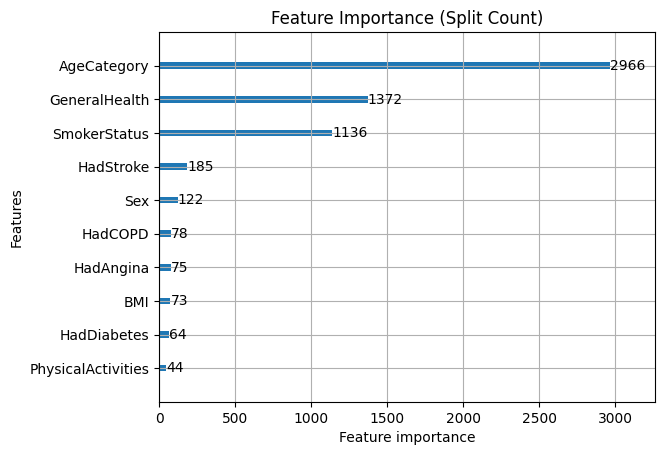

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming `model` is your trained LightGBM model
# and `X_val_encoded` is the validation set (used only for plotting the feature names)

# Plot the feature importance based on split count
lgb.plot_importance(lgb_model_2, importance_type='split', max_num_features=10)
plt.title("Feature Importance (Split Count)")
plt.show()



In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, confusion_matrix,
    classification_report, precision_score, recall_score, f1_score, auc
)

# Predict probabilities and binary outcomes
y_pred = lgb_model_2.predict(X_val_encoded)
y_pred_binary = (y_pred > 0.47).astype(int)

# Compute classification metrics
accuracy = accuracy_score(y_val, y_pred_binary)
roc_auc = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)  # Sensitivity
f1 = f1_score(y_val, y_pred_binary)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_binary)

# Calculate specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.86
ROC AUC Score: 0.87
Precision: 0.24
Recall (Sensitivity): 0.69
Specificity: 0.87
F1 Score: 0.35



Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     46573
           1       0.24      0.69      0.35      2632

    accuracy                           0.86     49205
   macro avg       0.61      0.78      0.64     49205
weighted avg       0.94      0.86      0.89     49205



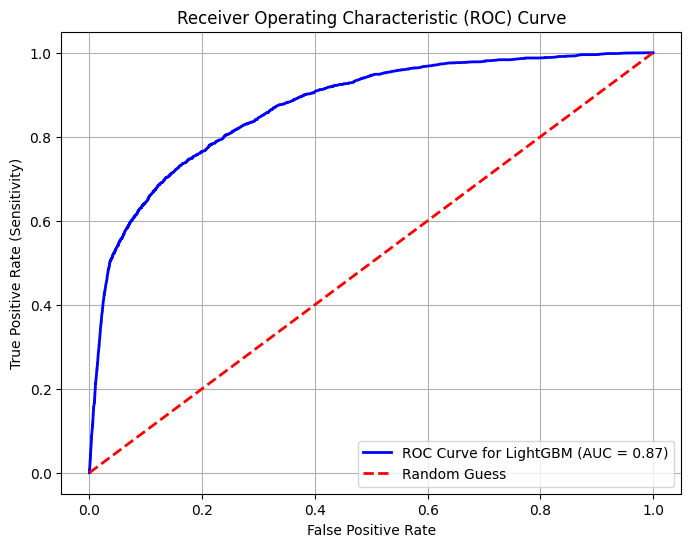

In [ ]:
# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred_binary))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve for LightGBM (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

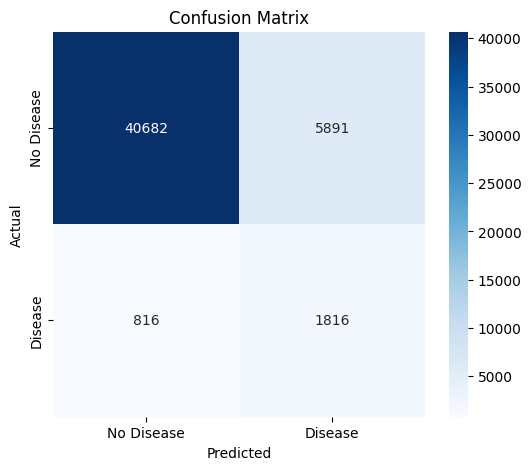

In [ ]:
# Confusion matrix visualization
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()